### Bibliotecas

In [2]:
import pandas as pd
%config IPCompleter.use_jedi = False
import seaborn as sns
import numpy as np

# Bibliotecas do Modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [3]:
pd.options.display.max_columns = None

In [4]:
sns.set_palette("Accent")
sns.set_style('darkgrid')

### Importando os dados

In [5]:
data = pd.read_csv('imoveis220117.csv').drop(columns = 'Unnamed: 0')

In [6]:
data.head()

,id_zap,type,n_parking_spaces,n_bathrooms,n_bedrooms,area,n_floors,units_on_floor,n_suites,state,city,neighborhood,street,longitude,latitude,price,condo_fee,iptu,resale,buildings,plan_only,amenities,pois_list,link,description,search_date
0,1037147005,APARTMENT,2.0,2.0,2.0,65.0,NaN,0,1.0,MG,Poços de Caldas,Centro,NaN,NaN,NaN,450000.0,350.0,0.0,0,0,0,['BARBECUE_GRILL' 'KITCHEN' 'ELEVATOR' 'INTERC...,"[{'class': 'SU', 'name': 'Colégio Pelicano - E...",/imovel/venda-apartamento-2-quartos-com-churra...,Apartamento a venda em Poços de Caldas. No cen...,2021-06-04
1,1037183091,APARTMENT,0.0,2.0,3.0,141.0,NaN,0,1.0,MG,Poços de Caldas,Centro,NaN,NaN,NaN,410000.0,200.0,0.0,0,0,0,['KITCHEN' 'BALCONY' 'HOME_OFFICE'],"[{'class': 'BR', 'name': 'Tenda do Habibi'}\n ...",/imovel/venda-apartamento-3-quartos-com-cozinh...,Apartamento a venda e locação em Poços de Cald...,2021-06-04
2,1039368805,APARTMENT,2.0,3.0,4.0,129.0,NaN,0,2.0,MG,Poços de Caldas,Jardim dos Estados,NaN,NaN,NaN,730000.0,650.0,0.0,0,0,0,['KITCHEN' 'ELEVATOR' 'BALCONY' 'SERVICE_AREA'],"[{'class': 'SU', 'name': 'Colégio Pelicano - E...",/imovel/venda-apartamento-4-quartos-com-cozinh...,"04 dormitórios, sendo 02 suítes, todos com arm...",2021-06-04
3,1039369157,APARTMENT,1.0,2.0,2.0,60.0,NaN,0,1.0,MG,Poços de Caldas,Residencial Morumbi,NaN,NaN,NaN,250000.0,100.0,0.0,0,0,0,['BARBECUE_GRILL' 'KITCHEN' 'GOURMET_BALCONY' ...,[],/imovel/venda-apartamento-2-quartos-com-churra...,"02 quartos (1 suíte), sala 02 ambientes, cozin...",2021-06-04
4,1039369264,APARTMENT,1.0,2.0,1.0,60.0,NaN,0,1.0,MG,Poços de Caldas,Jardim Quisisana,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,['KITCHEN' 'ELEVATOR' 'INTERCOM' 'BALCONY' 'AL...,"[{'class': 'SC', 'name': 'San Michel Supermerc...",/imovel/venda-apartamento-1-quarto-com-cozinha...,"01 suíte, sala com sacada, lavabo, cozinha, ár...",2021-06-04


# Casas

In [7]:
casas = data.loc[data['type'] == 'HOME'].copy()

### Box-plot dos preços

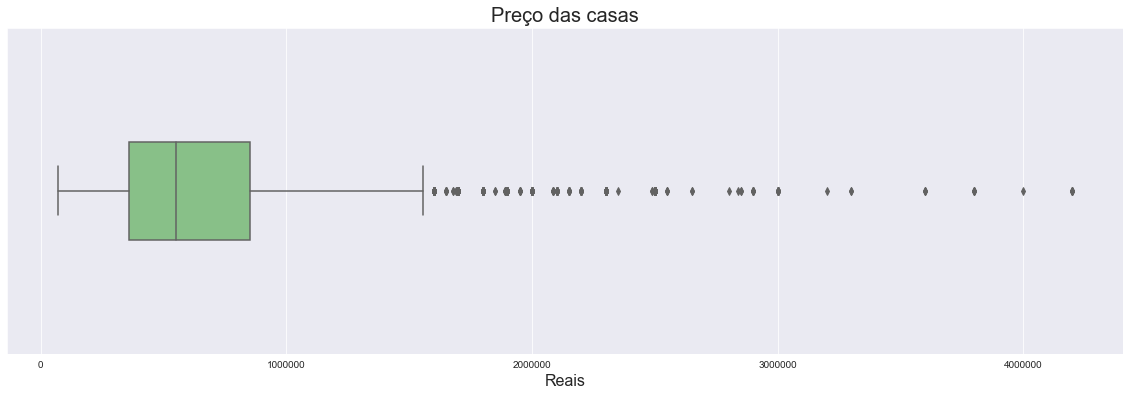

In [10]:
ax = sns.boxplot(x = 'price', data = casas, orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço das casas', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

### Preços por Bairro

In [13]:
df_bairros_grouped = casas.groupby('neighborhood')

In [14]:
df_bairros = df_bairros_grouped.agg(precos_bairros = ('price', 'mean'), contagem = ('id_zap', 'count'))

In [15]:
df_bairros = df_bairros[df_bairros['contagem'] > 10]

In [16]:
df_bairros.sort_values(by = 'precos_bairros', ascending = False).head(20)

,precos_bairros,contagem
neighborhood,,
Bortolan Norte I,2.197619e+06,21
Jardim Del Rey,1.787037e+06,27
Bortolan,1.693636e+06,45
Jardim Europa,1.658205e+06,205
Loteamento Jardim Nova Europa,1.512778e+06,18
Jardim Novo Mundo,1.401136e+06,118
Jardim dos Estados,1.390664e+06,110
São Domingos,1.305789e+06,19
Chacara Praia do Sol,1.266957e+06,23


### Correlação

In [11]:
casas.corr()['price'].sort_values()

longitude          -0.302096
id_zap             -0.142643
condo_fee          -0.014442
units_on_floor     -0.005742
buildings          -0.002873
resale              0.020560
iptu                0.141793
area                0.201767
latitude            0.331937
n_parking_spaces    0.469101
n_bedrooms          0.536187
n_suites            0.562072
n_bathrooms         0.569169
n_floors            0.715961
price               1.000000
plan_only                NaN
Name: price, dtype: float64

Através da análise de correlação acima, as variáveis que mais parecem influenciar o preço das casas são:
- Número de vagas de estacionamento
- Número de quartos
- Número de suítes
- Número de banheiros
- Número de andares

Para corroborar a análise, podemos verificar com um gráfico de dispersão.

### Gráfico de Dispersão Entre as Variáveis

Foram considerados na análise os imóveis que preenchessem todas as 3 condições:
- Número de banheiros menor ou igual a 10
- Número de suítes menor ou igual a 5
- Número de quartos menor ou igual a 8

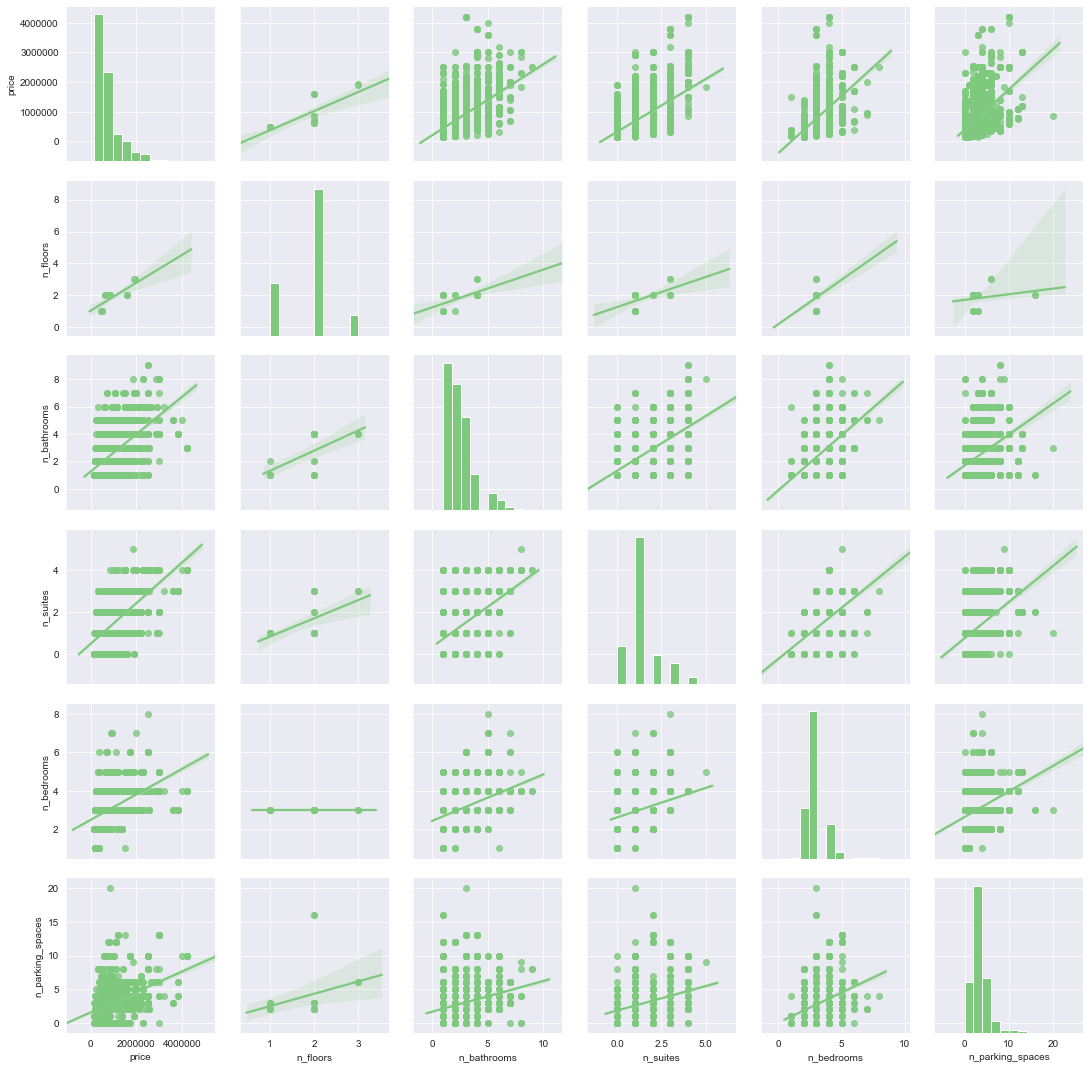

In [12]:
columns = ['price', 'n_floors', 'n_bathrooms', 'n_suites', 'n_bedrooms', 'n_parking_spaces']
df_plot = casas.copy()
df_plot = df_plot[columns]

df_plot = df_plot[
    (df_plot['n_bathrooms'] <= 10)
    & (df_plot['n_suites'] <= 5)
    & (df_plot['n_bedrooms'] <= 8)
]

sns.pairplot(data = df_plot, kind = 'reg')

Os gráficos obtidos corroboram os números observados na análise de correlação, portanto estas variáveis serão consideradas no modelo que será criado para avaliação dos preços.

Antes da elaboração do modelo, a normalidade dos dados deve ser verificada através de um histograma.

### Histograma

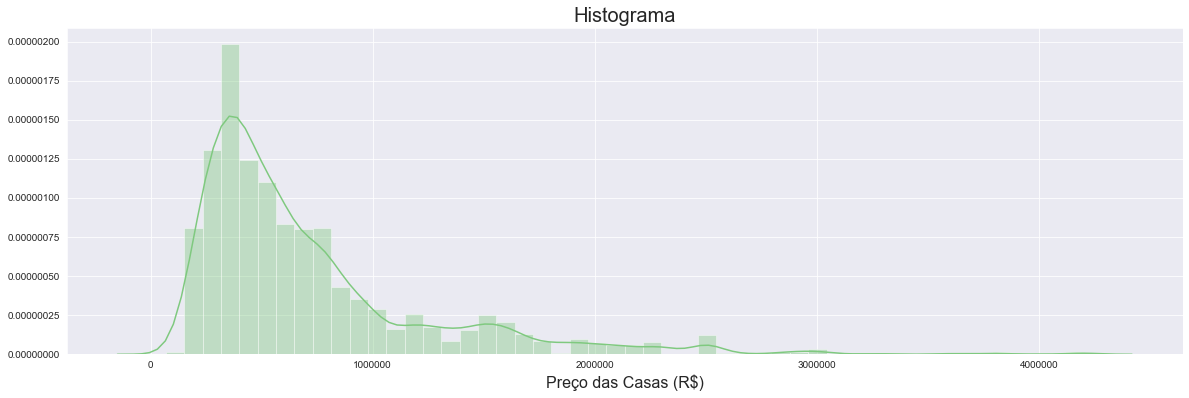

In [17]:
ax = sns.distplot(casas['price'].dropna())
ax.figure.set_size_inches(20, 6)
ax.set_title('Histograma', fontsize=20)
ax.set_xlabel('Preço das Casas (R$)', fontsize=16)
ax

O histograma obtido comprova o que já havia sido observado no box-plot, trata-se de uma distribuição assimétrica à direita.

Desta forma, antes de elaborar o modelo, as variáveis serão transformadas para apresentar distribuição normal. Neste projeto, será utilizada a transformação logarítmica.

# Modelo para Casas

### Transformação Logarítmica

In [18]:
casas['log_price'] = np.log(casas['price'])

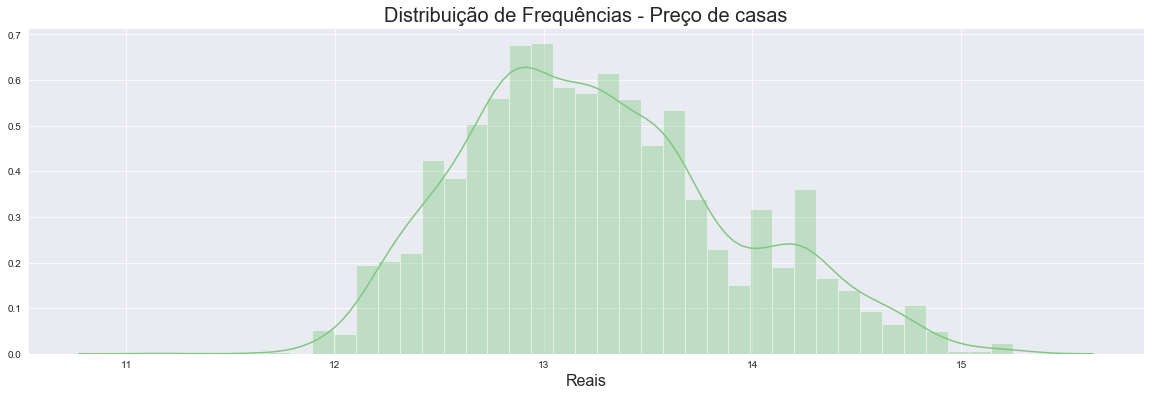

In [19]:
ax = sns.distplot(casas['log_price'].dropna())
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências - Preço de casas', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Após a tranformação logarítmica, a distribuição assemelha-se a uma distribuição normal. Portanto, serão utilizadas as variáveis transformadas na elaboração do modelo.

### Gráfico de Dispersão das Variáveis Transformadas

In [20]:
casas['log_n_floors'] = np.log(casas['n_floors'] + 1)
casas['log_n_bathrooms'] = np.log(casas['n_bathrooms'] + 1)
casas['log_n_suites'] = np.log(casas['n_suites'] + 1)
casas['log_n_bedrooms'] = np.log(casas['n_bedrooms'] + 1)
casas['log_n_parking_spaces'] = np.log(casas['n_parking_spaces'] + 1)

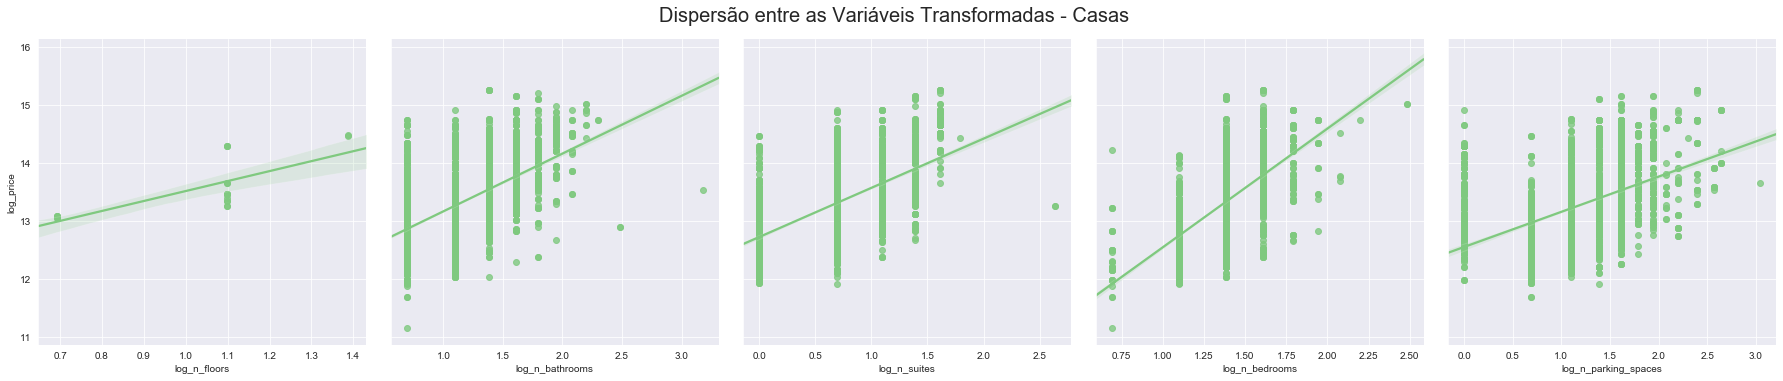

In [21]:
ax = sns.pairplot(data = casas, y_vars = 'log_price', x_vars = ['log_n_floors', 'log_n_bathrooms', 'log_n_suites', 'log_n_bedrooms', 'log_n_parking_spaces'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas - Casas', fontsize=20, y=1.05)
ax

### Modelo

In [22]:
casas_notna = casas[casas['price'].notna()]

In [23]:
X = casas_notna[['log_n_floors', 'log_n_bathrooms', 'log_n_suites', 'log_n_bedrooms', 'log_n_parking_spaces']]

In [24]:
y = casas_notna['log_price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
imputer = SimpleImputer()

In [27]:
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [28]:
X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

In [29]:
#model = LinearRegression()
model = GradientBoostingRegressor()

In [31]:
model.fit(X_train_imp, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1358: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.estimators_ = np.empty((0, 0), dtype=np.object)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for th

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_pred = model.predict(X_test_imp)

In [33]:
mean_absolute_error(np.exp(y_test), np.exp(y_pred))

221310.6221899255

### Gráfico de Dispersão Entre os Valores Reais e Estimados

In [34]:
y_previsto_train = model.predict(X_train_imp)

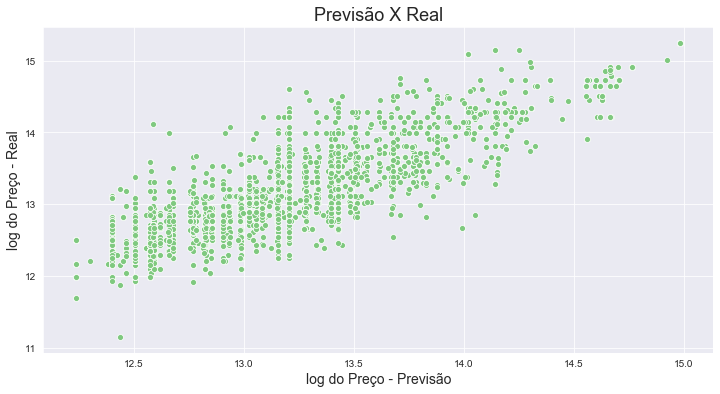

In [35]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [36]:
residuo = y_train - y_previsto_train

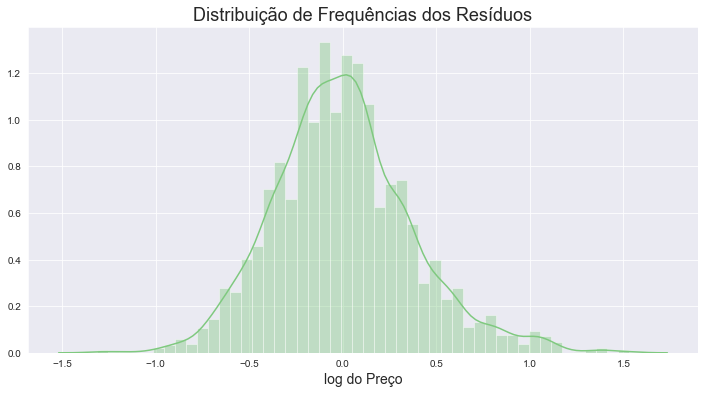

In [37]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

Os valores reais e previstos apresentam uma relação linear entre si, e os resíduos apresentam distribuição normal; são bons indicativos de que o modelo se ajusta bem aos dados.